`HK221 - SYSTEM PERFORMANCE EVALUATION (CO3007) - CC01`

`ASSIGNMENT 2` 

`TOPIC: SIMULATING QUEUEING SYSTEM M/M/1/K IN COMPARISION WITH M/M/1. ANALYSIS OF CUSTOMER REJECTION RATE BETWEEN TWO QUEUES.`

INSTRUCTOR:

Mr. Tran Van Hoai


STUDENTS:

Doan Viet Tu - 1952521

Vu Tien Giang - 1952240

---
  
- The goal of the simulation: 
  * To calculate the performance metrics of a M/M/1/k/$\infty$ then simulate.
  * To study the impact of the parameters on the system's performance metrics.
  * To analyze the customer rejection rate.
  * To compare the simulation result withs the analytical results.
- Boundaries of the system: 
  * Jupyter Notebook to run the scripts and visualize data.
  * Python 3.10.7 as interpreter.
- Performance metrics:
  * Interarrival time.
  * Average service time of a job.
  * Average waiting time of a job.
  * Capacity of the system.

**Import of required modules**

In [81]:
import simpy
import argparse
import numpy as np
import random
import matplotlib.pyplot as plt

**Parameters settings**

In [82]:
MEAN_INTERARRIVAL_TIME = 0.0105
MEAN_SERVICE_TIME = 0.01
POPULATION = 1000
RAND_NUM = 1234
SYSTEM_CAPACITY = 10
TRACE = True

**Job Generator**

In [83]:
def job_generator(env, mean_ia_time, mean_svc_time, server, wait_times, k_capacity, waiting, loss, number, trace):
    """to generate jobs with exponential interarrival time."""
    for i in range(number):
        ia_time = random.expovariate(1.0 / mean_ia_time)
        svc_time = random.expovariate(1.0 / mean_svc_time)
        jb = job(env, 'Packet-%d' % i, server, svc_time, wait_times, k_capacity, waiting, loss, trace)
        env.process(jb)
        yield env.timeout(ia_time)

**Process**

In [84]:
def job(env, name, server, service_time, wait_times, k_capacity, waiting, loss, trace):
    """to request a server, which is served for a given service_time, then to leave the server."""
    arrv_time = env.now
    waiting.append(1)  # new customer come, waiting number +1
    if trace:
        if len(waiting) > k_capacity:
            waiting.pop()  # new customer has to leave, waiting number -1
            loss.append(1)  # server lose a customer, loss number +1
        else:
            with server.request() as request:
                yield request  # wait til there is no customer in front of you
                wait_time = env.now - arrv_time
                wait_times.append(wait_time)
                # if trace:
                yield env.timeout(service_time)
                if trace:
                    waiting.pop()  # after service, customer leave

**Run simulation**

Arrival rate = 5, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000000
Arrival rate = 10, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000000
Arrival rate = 15, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000000
Arrival rate = 20, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000000
Arrival rate = 25, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000001
Arrival rate = 30, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000004
Arrival rate = 35, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000018
Arrival rate = 40, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000063
Arrival rate = 45, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000187
Arrival rate = 50, Capacity = 10, Customer Rejection Rate (theoretical) = 0.000489
Arrival rate = 55, Capacity = 10, Customer Rejection Rate (theoretical) = 0.001143
Arrival rate = 60, Capacity = 10, Customer Rejection Rate (theoretical) = 0.002433
Arriv

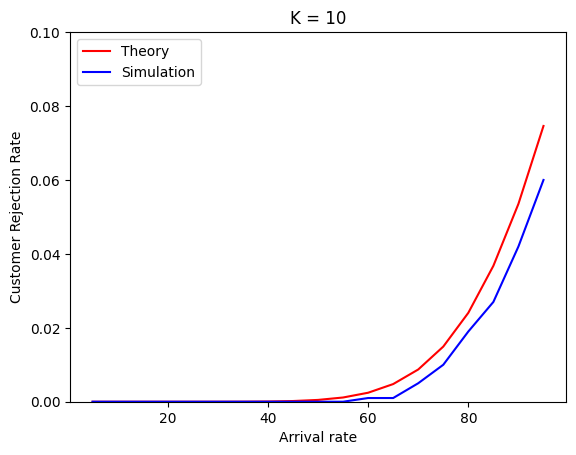

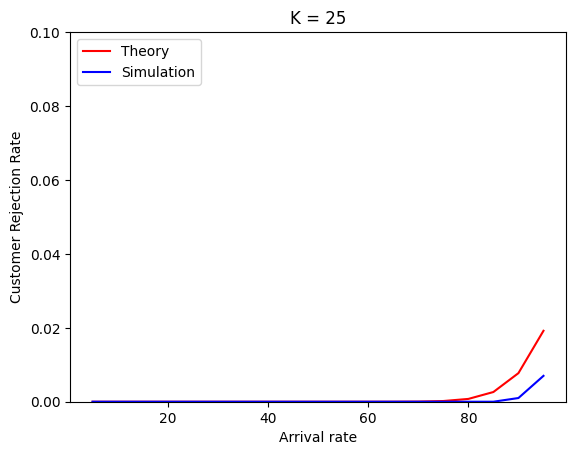

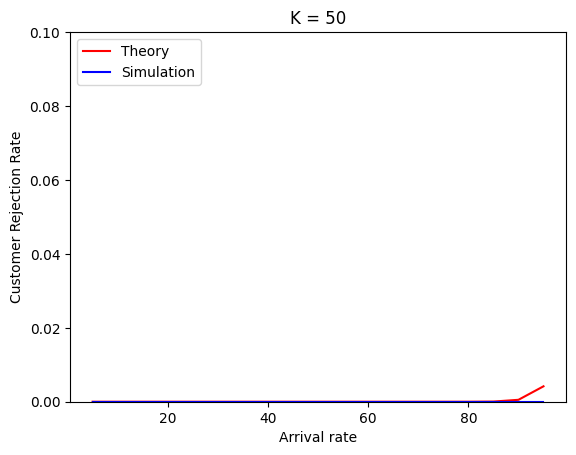

In [85]:
def start_simulation(mean_ia_time, mean_svc_time, k_capacity, num_packets=POPULATION, random_seed=RAND_NUM, trace=TRACE):
    """to run a simulation and returns statistics."""
    random.seed(random_seed)
    env = simpy.Environment()
    # start processes and run
    server = simpy.Resource(env, capacity=1)
    wait_times = []
    waiting = []
    loss = []
    env.process(job_generator(env, mean_ia_time,mean_svc_time, server, wait_times, k_capacity, waiting, loss, number=num_packets, trace=trace))
    env.run()
    # return statistics (i.e., mean waiting time)
    return np.mean(wait_times), len(loss)

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument(
        "-A",
        "--mean_ia_time",
        help="mean packet interarrival time [s]; default is 0.0105",
        default=MEAN_INTERARRIVAL_TIME,
        type=float)
    parser.add_argument(
        "-S",
        "--mean_svc_time",
        help="mean packet service time [s]; default is 0.01",
        default=MEAN_SERVICE_TIME,
        type=float)
    parser.add_argument(
        "-N",
        "--num_packets",
        help="number of packets to generate; default is 1000",
        default=POPULATION,
        type=int)
    parser.add_argument(
        "-R",
        "--random_seed",
        help="seed for random number generation; default is 1234",
        default=RAND_NUM,
        type=int)
    parser.add_argument(
        "-K",
        "--k_capacity",
        help="System capacity / The maximum number of people the system can queue",
        default=SYSTEM_CAPACITY,
        type=int)
    parser.add_argument('--trace', dest='trace', action='store_true')
    parser.add_argument('--no-trace', dest='trace', action='store_false')
    parser.set_defaults(trace=TRACE)
    args = parser.parse_args()

    # set variables using command-line arguments
    mean_ia_time = args.mean_ia_time
    mean_svc_time = args.mean_svc_time
    num_packets = args.num_packets
    random_seed = args.random_seed
    k_capacity = args.k_capacity
    trace = args.trace

    # run a simulation
    CR_the_matrix = []
    CR_sim_matrix = []
    lmd_list = []
    lmd = 0
    miu = 100
    k_list = [10, 25, 50]
    for n in range(19):
        lmd += 5
        lmd_list.append(lmd)  # arrival rate

    for k in k_list:
        CR_the_list = []
        for lmd in lmd_list:
            # print statistics from the simulation
            '''Compute Theoretical Customer Rejection Rate'''
            rho = lmd / miu
            p0 = (1 - rho) / (1-rho**(k+1))
            pn_sum = 0
            for j in range(k):
                pn = (rho ** j) * p0
                pn_sum = pn_sum + pn
            pk = (rho ** k) * p0
            CR_the = pk / pn_sum
            CR_the_list.append(CR_the)
            print("Arrival rate = %d, Capacity = %d, Customer Rejection Rate (theoretical) = %f" % (lmd, k, CR_the))
        CR_the_matrix.append(CR_the_list)

    for k in k_list:
        CR_sim_list = []
        for lmd in lmd_list:
            mean_ia_time = 1/lmd
            mean_svc_time = 1/miu
            k_capacity = k
            mean_waiting_time, loss_times = start_simulation(mean_ia_time, mean_svc_time, k_capacity, num_packets, random_seed, trace)
            CR_sim = loss_times / num_packets
            CR_sim_list.append(CR_sim)
            print("Arrival rate = %d, Capacity = %d, Customer Rejection Rate (simulation) = %f, Average waiting time = %.4Es" % (lmd, k, CR_sim, mean_waiting_time))
        CR_sim_matrix.append(CR_sim_list)

    """plot """
    for m in range(3):
        plt.ylim(0, 0.1)
        plt.plot(lmd_list, CR_the_matrix[m], 'r', label='Theory')
        plt.plot(lmd_list, CR_sim_matrix[m], 'b', label='Simulation')
        plt.legend(loc='upper left')
        plt.xlabel("Arrival rate")
        plt.ylabel("Customer Rejection Rate")
        if m == 0:
            plt.title("K = 10")
        elif m == 1:
            plt.title("K = 25")
        elif m == 2:
            plt.title("K = 50")
        plt.show()

- `CONCLUSION`: About the analysis of customer rejection rate between two queues:

According to the resulted graphs, the customer rejection rate increases when arrival rate increases. The increase of rejection rate based on system capacity k in model M/M/1/k, appears sooner or later when k changes from 10 to 25, upto 50. While in mode M/M/1, k is infinite, so there is no rejection rate because no customer has to leave the waiting queue. 

---